<a href="https://colab.research.google.com/github/Samchafi78/Machine-Learning-project/blob/main/Projet_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Machine Learning -- Samir CHAFI RAHAMATTOULLA

# Récupration du Dataset:

Maintenant, je vais récupérer le dataset que je vais utiliser dans ce projet.

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving raw_merged_heart_dataset.csv to raw_merged_heart_dataset.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(data_to_load['raw_merged_heart_dataset.csv']))

# Afficher les premières lignes du datset
print(df.head())

   age  sex  cp trestbps chol fbs restecg thalachh exang  oldpeak slope ca  \
0   63    1   3      145  233   1       0      150     0      2.3     0  0   
1   37    1   2      130  250   0       1      187     0      3.5     0  0   
2   41    0   1      130  204   0       0      172     0      1.4     2  0   
3   56    1   1      120  236   0       1      178     0      0.8     2  0   
4   57    0   0      120  354   0       1      163     1      0.6     2  0   

  thal  target  
0    1       1  
1    2       1  
2    2       1  
3    2       1  
4    2       1  


# Description du dataset:
Ce dataset contient 1 888 enregistrements fusionnés à partir de cinq ensembles de données sur les maladies cardiaques accessibles au public. Il comprend 14 caractéristiques cruciales pour prédire les risques de crise cardiaque et d'accident vasculaire cérébral, couvrant à la fois des facteurs médicaux et démographiques. Vous trouverez ci-dessous une description détaillée de chaque caractéristique.

Description des caractéristiques
* **âge**: Âge du patient (numérique).

*  **sex**: Sexe du patient. Valeurs : 1 = homme, 0 = femme.

* **cp**: Type de douleur thoracique. Valeurs : 0 = angine de poitrine typique, 1 = angine de poitrine atypique, 2 = douleur non angineuse, 3 = asymptomatique.
* **trestbps**: Pression artérielle au repos (en mm Hg) (numérique).

*  **chol**: Taux de cholestérol sérique (en mg/dl) (Numérique).
*  **fbs**: Glycémie à jeun > 120 mg/dl. Valeurs : 1 = vrai, 0 = faux.


*   **restecg**: Résultats de l'électrocardiographie au repos. Valeurs : 0 = Normal, 1 = Anomalie de l'onde ST-T, 2 = Hypertrophie ventriculaire gauche.

*   **thalach**: Fréquence cardiaque maximale atteinte (numérique).
*   **exang**: Angine de poitrine à l'effort. Valeurs : 1 = oui, 0 = non.


*   **oldpeak**: Dépression ST induite par l'exercice par rapport au repos (numérique).


*   **slope**: Pente du segment ST de pointe à l'effort. Valeurs : 0 = pente ascendante, 1 = plate, 2 = pente descendante.
*   **ca**: Nombre de vaisseaux principaux (0-3) colorés par fluoroscopie. Valeurs : 0, 1, 2, 3.


*   **thal**: Types de thalassémie. Valeurs : 1 = normal, 2 = anomalie fixe, 3 = anomalie réversible.
*   **target**: Variable de résultat (risque de crise cardiaque ): Variable de résultat (risque de crise cardiaque). Valeurs : 1 = plus de risque de crise cardiaque, 0 = moins de risque de crise cardiaque



# I) Description des Données

In [3]:
# Afficher le type de chaque colonne
print("Types des colonnes dans le DataFrame :")
print(df.dtypes)

Types des colonnes dans le DataFrame :
age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalachh     object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object


In [4]:
# nombre de lignes et de colonnes
n_lignes, n_colonnes = df.shape

print(f"Nombre de lignes : {n_lignes}")
print(f"Nombre de colonnes : {n_colonnes}")

Nombre de lignes : 2181
Nombre de colonnes : 14


Cela correspond bien au nombre de lignes et colonne de mon jeu de données

## Visualisations du jeu de données

Importation des librairies de visualisations

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogrammes des relations

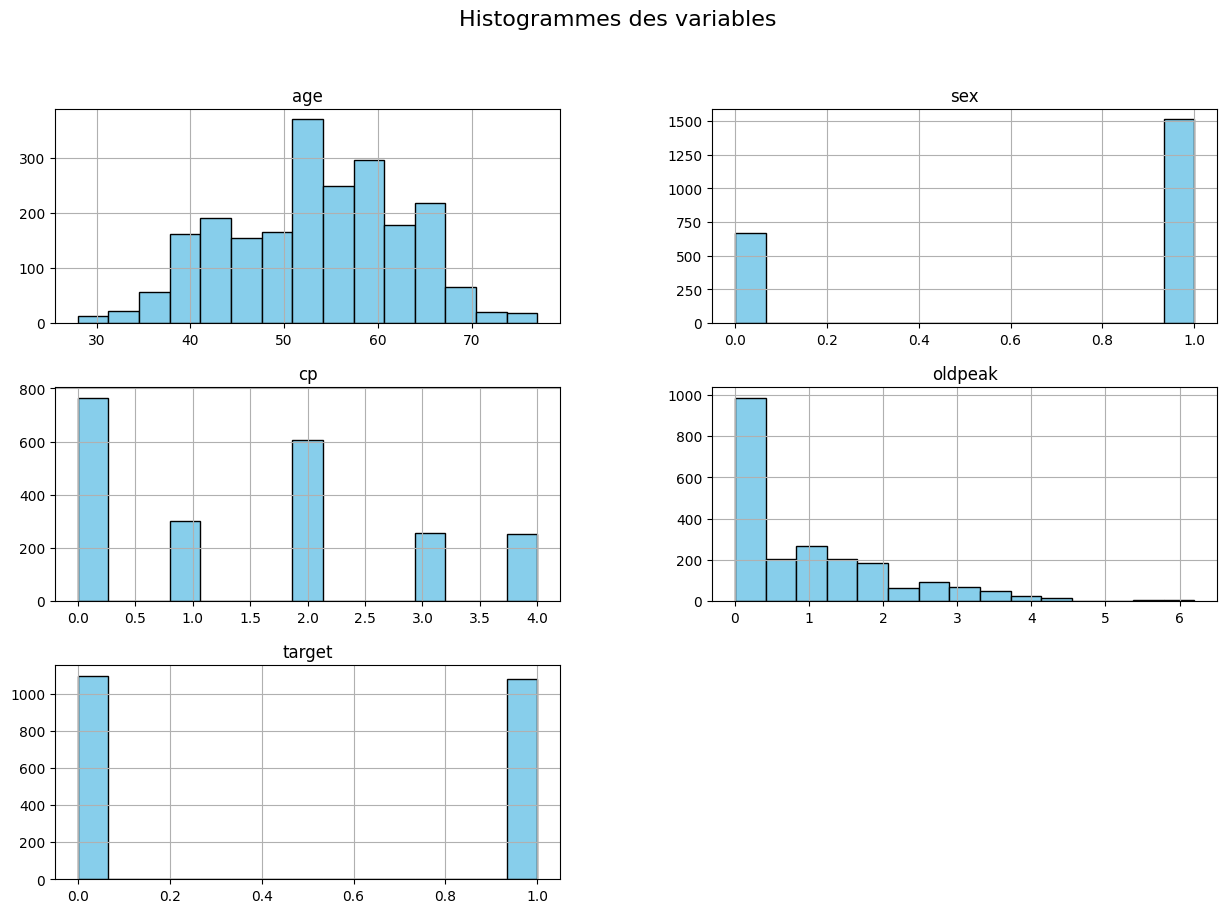

In [6]:
# Histogrammes des variables numériques
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogrammes des variables", fontsize=16)
plt.show()

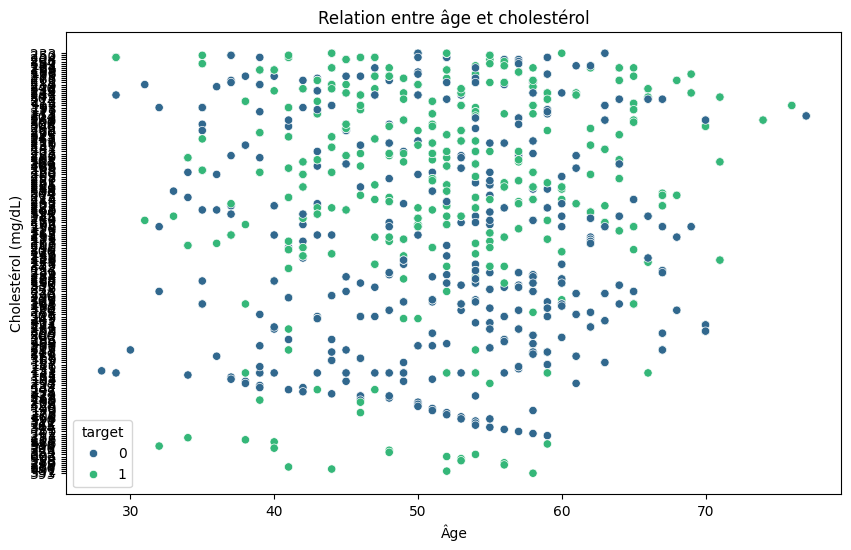

In [7]:
# Relation entre l'âge et le cholestérol
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="age", y="chol", hue="target", palette="viridis")
plt.title("Relation entre âge et cholestérol")
plt.xlabel("Âge")
plt.ylabel("Cholestérol (mg/dL)")
plt.show()

On peut observer que la répartition des 2 classes de target sont principalement centré entre -2 et 1 sur l'axe de l'age et entre -2 et 2 sur l'axe cholestérol

# II) Nettoyage des Données

Certaine colonnes de mon jeu de données ne sont pas dans le bon type (object). Je vais donc convertir ces colonnes en questions en type numérique (float) afin de faire une nettoyage de données plus facilement

In [6]:
# Colonnes à convertir de string à numérique
columns_to_convert = ["trestbps", "chol", "fbs", "restecg", "thalachh", "exang", "slope", "ca", "thal"]
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Conversion en type numérique (float)

# Vérification des types de colonnes après conversion
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalachh    float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


## 1) Valeurs manquantes

Maintenant, je vais voir si mon jeu de données contient des valeurs manquantes

In [7]:
valeur_manquante = df.isnull().sum()
print("Nombre de valeurs manquantes par colonne :\n", valeur_manquante)

Nombre de valeurs manquantes par colonne :
 age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalachh      1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64


Comme on peut l'observer, 9 colonnes possèdent des valeurs manquantes qui doivent être traitées. Comme ces valeurs sont nombreuses, je ne peux pas les supprimer car cela engendrera un problème lors de l'utilisation de modèle de machine Learning. Pour résoudre ce soucis, je vais affecter la moyenne de la colonnes s'il s'agit de variable numérique et appliquer la stratégie "most frequent" s'il s'agit de variable catégorique.

In [8]:
from sklearn.impute import SimpleImputer

# traitement des colonnes numériques
num_colonne = SimpleImputer(strategy='mean')  # Remplacement par la moyenne
df[columns_to_convert] = num_colonne.fit_transform(df[columns_to_convert])

# traitement des colonnes catégoriques
cat_colonne = SimpleImputer(strategy='most_frequent')  # Remplacement par la valeur la plus fréquente
categorical_columns = ["sex", "cp", "restecg", "slope", "thal"]
df[categorical_columns] = cat_colonne.fit_transform(df[categorical_columns])

Maintenant, je vais vérifier si toutes les valeurs manquantes ont été traitées:

In [9]:
missing_values_after = df.isnull().sum()
print("Valeurs manquantes après traitement :\n", missing_values_after)

Valeurs manquantes après traitement :
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Comme on peut le voir sur l'affichage juste au dessus, mon dataset ne contient plus de valeurs manquante.

## 2) Valeurs aberrantes ou des données anormales

Maintenant, je vais identifier s'il y a la présence de valeurs aberrantes ou anormales dans mon jeu de données. Dans un premier temps, je vais faire une description du dataset afin de voir des statistiques (min, max, moyenne...) pour avoir un aperçu des valeurs et leur intervalles (min-max)

In [10]:
print(df.describe())

# Vérification des valeurs extrêmes dans les colonnes numérique
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"{column} - Min: {df[column].min()}, Max: {df[column].max()}")

               age          sex           cp     trestbps         chol  \
count  2181.000000  2181.000000  2181.000000  2181.000000  2181.000000   
mean     53.477762     0.693260     1.507565   131.679817   247.366543   
std       9.194787     0.461246     1.371587    17.561458    53.609757   
min      28.000000     0.000000     0.000000    92.000000    85.000000   
25%      46.000000     0.000000     0.000000   120.000000   211.000000   
50%      54.000000     1.000000     2.000000   130.000000   243.000000   
75%      60.000000     1.000000     2.000000   140.000000   276.000000   
max      77.000000     1.000000     4.000000   200.000000   603.000000   

               fbs      restecg     thalachh        exang      oldpeak  \
count  2181.000000  2181.000000  2181.000000  2181.000000  2181.000000   
mean      0.138058     0.546789   148.064220     0.327523     0.990509   
std       0.344407     0.631086    23.320887     0.469310     1.141851   
min       0.000000     0.000000    71

Ensuite, je vais faire un calcul des Z-scores avec un seuil inférieur et supérieur à 3 afin de remplacer les valeurs anormales

In [11]:
from scipy.stats import zscore

# Calcul des Z-scores
z_scores = df.select_dtypes(include=['float64', 'int64']).apply(zscore)

# Identifier les valeurs avec un Z-Score |Z|>3
val_anormale = (z_scores.abs() > 3).sum()
print("Nombre de valeurs aberrantes/anormales par colonne :\n", val_anormale)

Nombre de valeurs aberrantes/anormales par colonne :
 age           0
sex           0
cp            0
trestbps     15
chol         26
fbs           0
restecg       0
thalachh      7
exang         0
oldpeak      14
slope         0
ca           28
thal        115
target        0
dtype: int64


In [12]:
# Liste des colonnes à traiter
columns_to_check = ["trestbps", "chol", "thalachh", "oldpeak", "ca", "thal"]
# Bornes supérieures et inférieures
for column in columns_to_check:
    q_low = df[column].quantile(0.01)  # Quantile inférieur
    q_high = df[column].quantile(0.99)  # Quantile supérieur

# Remplacement des valeurs hors bornes
    df[column] = df[column].clip(lower=q_low, upper=q_high)

print("remplacement des valeurs extrêmes terminé.")

remplacement des valeurs extrêmes terminé.


Maintenant que mon jeu de donnée est quasiment nettoyé, je vais enfin pouvoir faire une matrice de corrélation. Je peux le faire seulement maintenant, car avant mon dataset possédait des valeurs incohérentes comme "???" et cela m'empêchait de créer cette matrice.

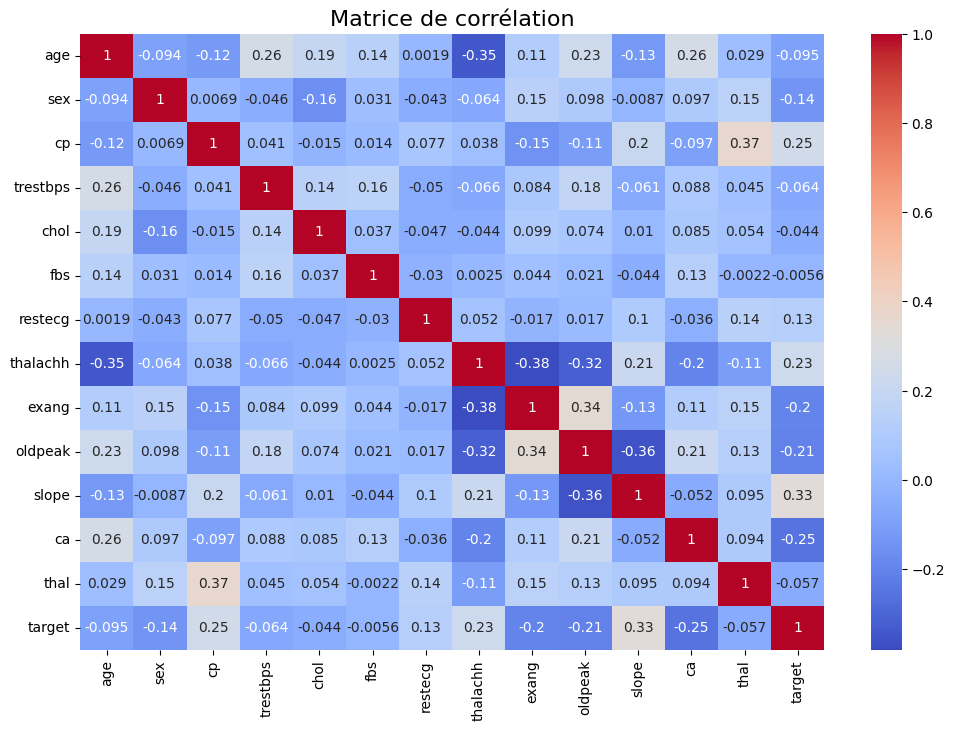

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation", fontsize=16)
plt.show()

Comme on peut l'observer, ma matrice ne semble quasiment pas corrélées entre les différentes variables, ce qui est une bonne chose

## 3) Données incohérentes ou redondantes

Maintenant, je vais traiter les données incohérentes ou/et redondantes. Dans un premier temps je vais les identifier puis je vais réduire ces redondances si besoin

In [14]:
# Vérification des doublons dans le dataset
duplicate_rows = df.duplicated().sum()
print(f"Nombre de doublons : {duplicate_rows}")

# Détection des valeurs incohérentes
for column in categorical_columns:  # List des colonnes catégoriques
    print(f"Valeurs uniques dans la colonne {column}:")
    print(df[column].unique())

Nombre de doublons : 1287
Valeurs uniques dans la colonne sex:
[1. 0.]
Valeurs uniques dans la colonne cp:
[3. 2. 1. 0. 4.]
Valeurs uniques dans la colonne restecg:
[0.         1.         2.         0.54678899]
Valeurs uniques dans la colonne slope:
[0.         2.         1.         1.44600703 3.        ]
Valeurs uniques dans la colonne thal:
[1.         2.         3.         2.70391645 6.         7.        ]


Comme on peut le remarquer, les colonnes catégorielles ne possèdent pas de données incohérentes ce qui est une bonne chose. Ainsi, il n'est pas nécessaire de traiter cette partie. Ensuite, on peut voir que le nombre de ligne en doublons est assez élevé mais cela est normal car la corrélation entre certaines colonnes peut engendrer ça mais ce ne sont pas des doublons réels

## 4) Standardisation des données






Mainntenant, je vais standardisé mes colonnes numériques car il se peut que certaines plage de valeurs de ces collones sont assez large ce qui peut augmenter le temps de convergence ce qui n'est pas bon pour les performance des modèles dans la tache de prédiction


In [15]:
from sklearn.preprocessing import StandardScaler

# Standardisation des colonnes numériques
scaler = StandardScaler()
numeric_columns = ["age", "trestbps", "chol", "thalachh", "oldpeak"]
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# III.Ingénierie des Caractéristiques


Les étapes de préprocessing sont essentielles pour préparer les données avant leur utilisation dans des modèles de machine learning. Elles incluent la transformation des colonnes catégoriques en représentations numériques (StringIndexer), et leur encodage en vecteurs binaires (OneHotEncoder) pour éviter les biais d'ordre. L'utilisation d'un pipeline permet d'automatiser et de standardiser ces transformations, garantissant un jeu de données propre, cohérent et adapté aux algorithmes d'apprentissage.

## Encodage catégorielle des variables

Pour l'encodage catégorielle, j'ai choisi la méthode du One-Hot Encoding que j'ai utilisé avec un pipeline afin d'automatiser l'ensemble du processus.

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Colonnes catégoriques à encoder
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Colonnes numériques sans encodage nécessaire
numeric_columns = ["age", "trestbps", "chol", "thalachh", "oldpeak"]

# Séparation des features (X) et de la cible (target) (y)
X = df.drop(columns=["target"])
y = df["target"]

# Encodage OneHotEncoder
column_transformer = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_columns)  # Suppression d'une catégorie pour éviter la colinéarité
    ],
    remainder="passthrough"  # Conserver les colonnes numériques
)

# Pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", column_transformer)
])

# Transformation des données et division en train/test
X_encoded = pipeline.fit_transform(X)

# Séparation en train (60%) et test + validation (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

# Séparation en validation (20%) et test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Affichage des dimensions des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de validation : {X_val.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")

Taille de l'ensemble d'entraînement : (1308, 31)
Taille de l'ensemble de validation : (436, 31)
Taille de l'ensemble de test : (437, 31)


In [17]:
import pandas as pd

#affichage du dataframe avec les colonnes encodées
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.813448,0.490343,0.504585,1.170768,0.925276
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.595883,-0.561545,0.564689,0.082342,0.925276
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,-0.051972,-0.094039,0.344307,-0.222418,-0.525694
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.470979,1.191601,-0.697500,0.082342,-0.162951
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.906108,-1.262803,0.364342,-0.788399,-0.888437


# IV. Sélection des modèles

Dans cette section, je vais appliquer différent modèles d'apprentissages sur mon jeu de donnée nettoyé et encodé afin de les comparer et touver le modèle le plus performant dans mon cas

## 1) Régression logistique

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.model_selection import cross_val_score

# Initialisation de la régression logistique
logistic_reg = LogisticRegression(
        solver='liblinear',    # Algorithme adapté aux petits datasets
        C=1,
        max_iter=100,          # nombre d'itérations
        random_state=20        # Reproductibilité
        )

# Entraînement du modèle
logistic_reg.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = logistic_reg.predict(X_test)

# Évaluation
accuracy_lg = accuracy_score(y_test, y_pred)
f1_lg = f1_score(y_test, y_pred, average="weighted")
print(f"Précision de la régression logistique : {accuracy_lg:.4f}")
print(f"F1-Score : {f1_lg:.4f}")

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Validation croisée
cv_scores = cross_val_score(logistic_reg, X_train, y_train, cv=20, scoring="accuracy")

# Affichage des résultats
print("Scores de validation croisée :", cv_scores)
print(f"Précision moyenne : {cv_scores.mean():.3f}")

Précision de la régression logistique : 0.8055
F1-Score : 0.8053

Rapport de classification :
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       227
           1       0.81      0.78      0.79       210

    accuracy                           0.81       437
   macro avg       0.81      0.80      0.80       437
weighted avg       0.81      0.81      0.81       437

Scores de validation croisée : [0.77272727 0.84848485 0.74242424 0.77272727 0.78787879 0.83333333
 0.81818182 0.8030303  0.76923077 0.78461538 0.73846154 0.84615385
 0.84615385 0.87692308 0.84615385 0.84615385 0.86153846 0.84615385
 0.72307692 0.90769231]
Précision moyenne : 0.814


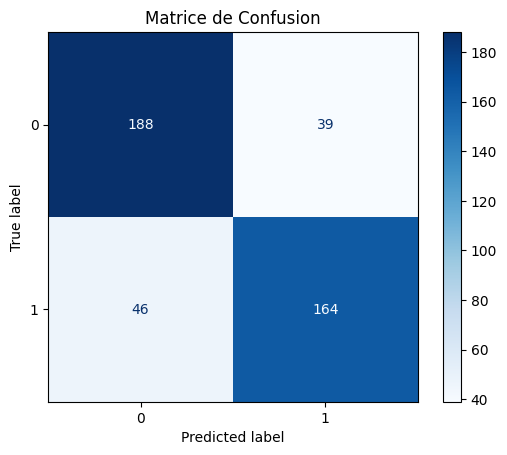

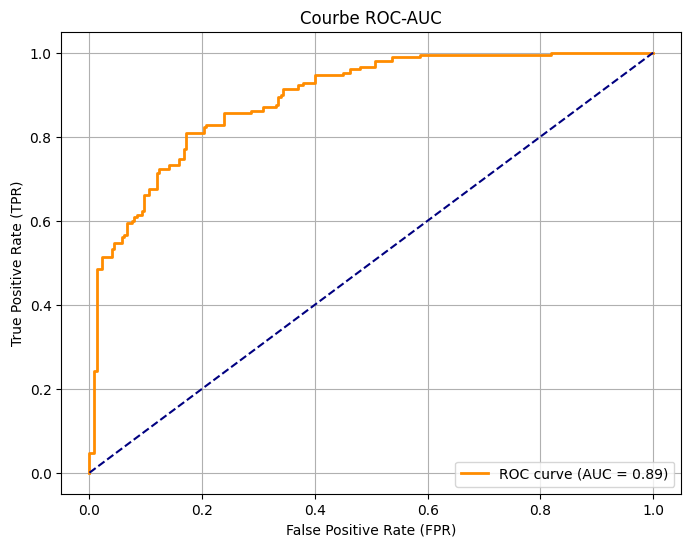

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matrice de Confusion")
plt.show()

# Courbe ROC-AUC
y_prob = logistic_reg.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Visualisation de la courbe ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})", color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")  # Diagonale de référence
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Courbe ROC-AUC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 2) Arbre de décision

Précision de l'arbre de décision : 0.8146
F1-Score : 0.8125

Rapport de classification :
               precision    recall  f1-score   support

           0       0.77      0.91      0.84       227
           1       0.88      0.71      0.79       210

    accuracy                           0.81       437
   macro avg       0.83      0.81      0.81       437
weighted avg       0.82      0.81      0.81       437



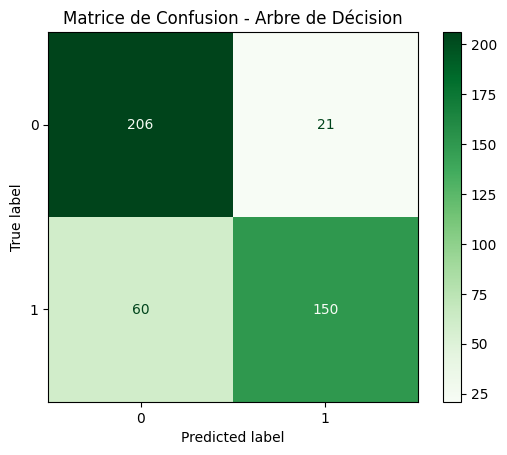

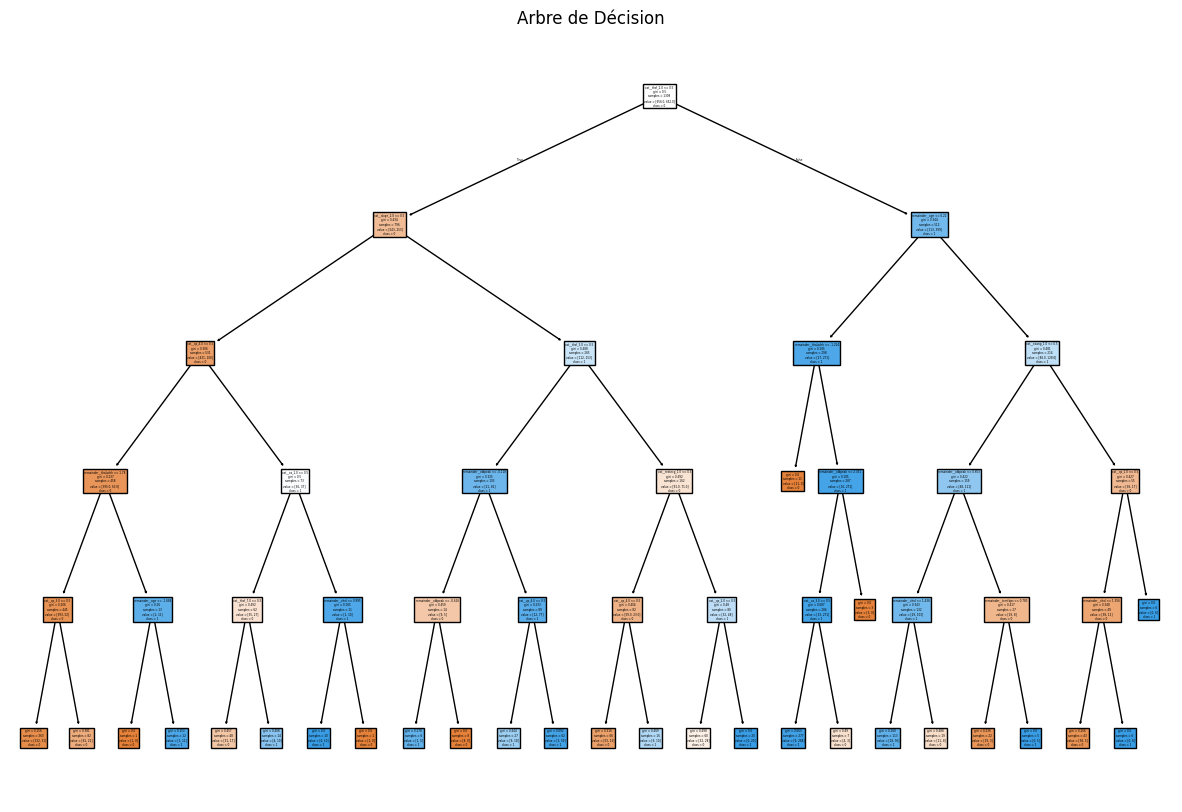

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,f1_score

# Initialisation de l'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=20, max_depth=5)

# Entraînement du modèle
decision_tree.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_tree = decision_tree.predict(X_test)

# Évaluation
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average="weighted")
print(f"Précision de l'arbre de décision : {accuracy_tree:.4f}")
print(f"F1-Score : {f1_tree:.4f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred_tree))

# Visualisation de la matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap="Greens")
plt.title("Matrice de Confusion - Arbre de Décision")
plt.show()

# Visualisation de l'arbre de décision
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=pipeline["preprocessor"].get_feature_names_out(), class_names=["0", "1"], filled=True)
plt.title("Arbre de Décision")
plt.show()

## 3) Forêt aléatoire

Précision de la forêt aléatoire : 0.9451
F1-Score : 0.9451

Rapport de classification :
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       227
           1       0.94      0.95      0.94       210

    accuracy                           0.95       437
   macro avg       0.94      0.95      0.95       437
weighted avg       0.95      0.95      0.95       437



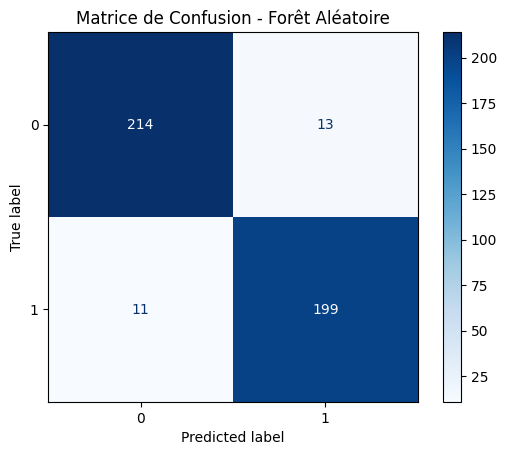

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,f1_score

# Initialisation de la forêt aléatoire
random_forest = RandomForestClassifier(n_estimators=100, random_state=40, max_depth=10)

# Entraînement du modèle
random_forest.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = random_forest.predict(X_test)

# Évaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")
print(f"Précision de la forêt aléatoire : {accuracy_rf:.4f}")
print(f"F1-Score : {f1_rf:.4f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf))

# Visualisation de la matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap="Blues")
plt.title("Matrice de Confusion - Forêt Aléatoire")
plt.show()

## 4) Extra Trees Classifier

Précision du Extra Trees Classifier : 0.9634
F1-Score : 0.9634

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       227
           1       0.96      0.97      0.96       210

    accuracy                           0.96       437
   macro avg       0.96      0.96      0.96       437
weighted avg       0.96      0.96      0.96       437



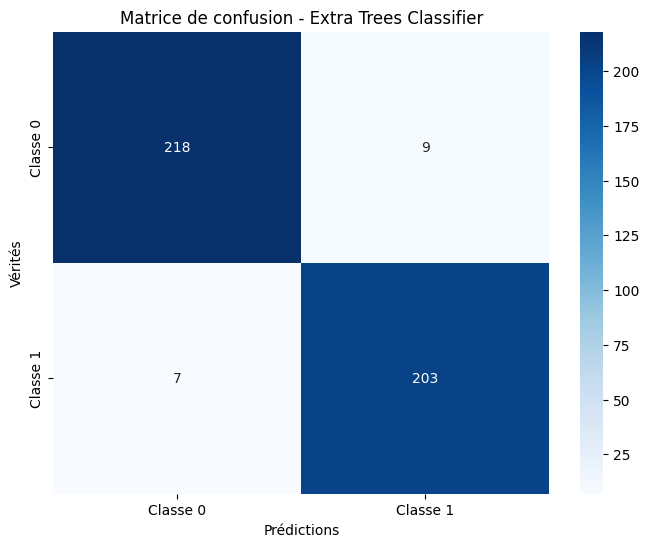

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialisation du modèle Extra Trees
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
etc.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_etc = etc.predict(X_test)

# Évaluation
accuracy_etc = accuracy_score(y_test, y_pred_etc)
f1_etc = f1_score(y_test, y_pred_etc, average="weighted")
print(f"Précision du Extra Trees Classifier : {accuracy_etc:.4f}")
print(f"F1-Score : {f1_etc:.4f}")

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_etc))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_etc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de confusion - Extra Trees Classifier")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

## 5) Comparaison des modèles

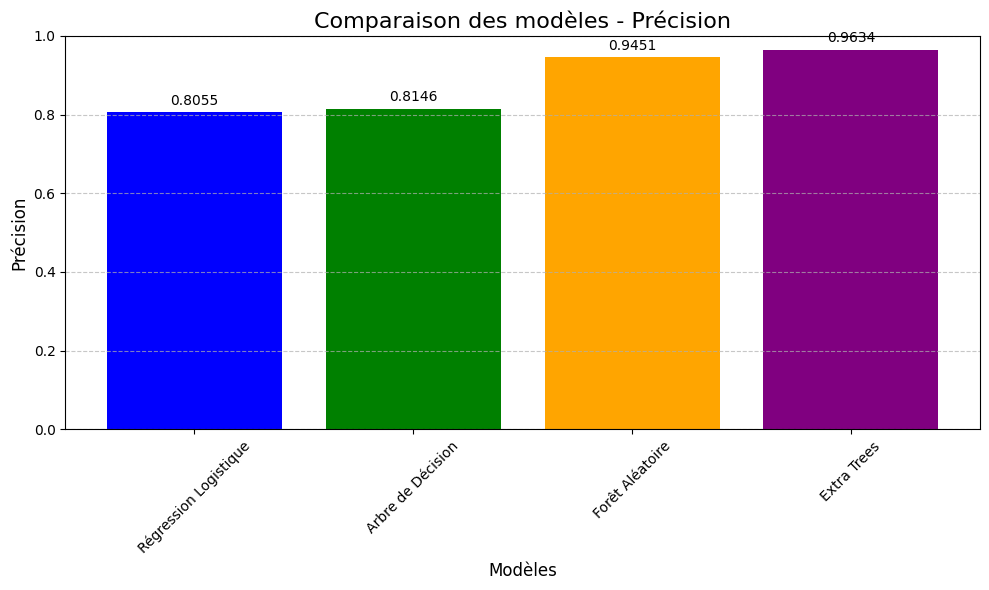

In [26]:
import matplotlib.pyplot as plt

models = ["Régression Logistique", "Arbre de Décision", "Forêt Aléatoire", "Extra Trees"]
accuracies = [accuracy_lg, accuracy_tree, accuracy_rf, accuracy_etc]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=["blue", "green", "orange", "purple"])
plt.ylim(0, 1)
plt.title("Comparaison des modèles - Précision", fontsize=16)
plt.xlabel("Modèles", fontsize=12)
plt.ylabel("Précision", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher des valeurs
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f"{accuracy:.4f}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

## 6) Jeu de donnée déséquilibé?

In [27]:
# Nombre d'occurrences de chaque classe
class_counts = y.value_counts()
print("Répartition des classes :")
print(class_counts)

# Affichage en pourcentage
class_percentages = y.value_counts(normalize=True) * 100
print("\nRépartition des classes (en pourcentage) :")
print(class_percentages)

Répartition des classes :
target
0    1099
1    1082
Name: count, dtype: int64

Répartition des classes (en pourcentage) :
target
0    50.389729
1    49.610271
Name: proportion, dtype: float64


On voit que les 2 classes de mon target sont assez équilibé. Donc il n'y a pas de soucis de déséquilibre dans mon jeu de données

# V.Evaluation

Dans cette section, je vais analyser les résultats et les erreurs que j'ai obtenu et faire une étude d'ablation afin de voir l'impact de la suppression des différentes caractéristique sur mes performances
Enfin je vais comparer mes modèles à des modèles de base afin de voir l'amélioration des performances avec mes modèles

## 1) étude d'ablation

L'étude d'ablation que je vais effectuer sera basé sur le modèle de la régression logistique car il s'agit du modèle le plus simple et rapide pour ma classification


=== Résultats de l'Étude d'Ablation ===
                    Feature Removed  Accuracy  F1-Score
0                      cat__sex_1.0  0.805492  0.794189
1                       cat__cp_1.0  0.816934  0.810427
2                       cat__cp_2.0  0.794050  0.786730
3                       cat__cp_3.0  0.814645  0.805755
4                       cat__cp_4.0  0.794050  0.786730
5      cat__fbs_0.13805798435342845  0.805492  0.794189
6                      cat__fbs_1.0  0.807780  0.801887
7   cat__restecg_0.5467889908256881  0.803204  0.791262
8                  cat__restecg_1.0  0.821510  0.811594
9                  cat__restecg_2.0  0.805492  0.794189
10    cat__exang_0.3275229357798165  0.805492  0.794189
11                   cat__exang_1.0  0.796339  0.785542
12                   cat__slope_1.0  0.816934  0.807692
13    cat__slope_1.4460070316423907  0.810069  0.800000
14                   cat__slope_2.0  0.798627  0.787440
15                   cat__slope_3.0  0.805492  0.794189
16     

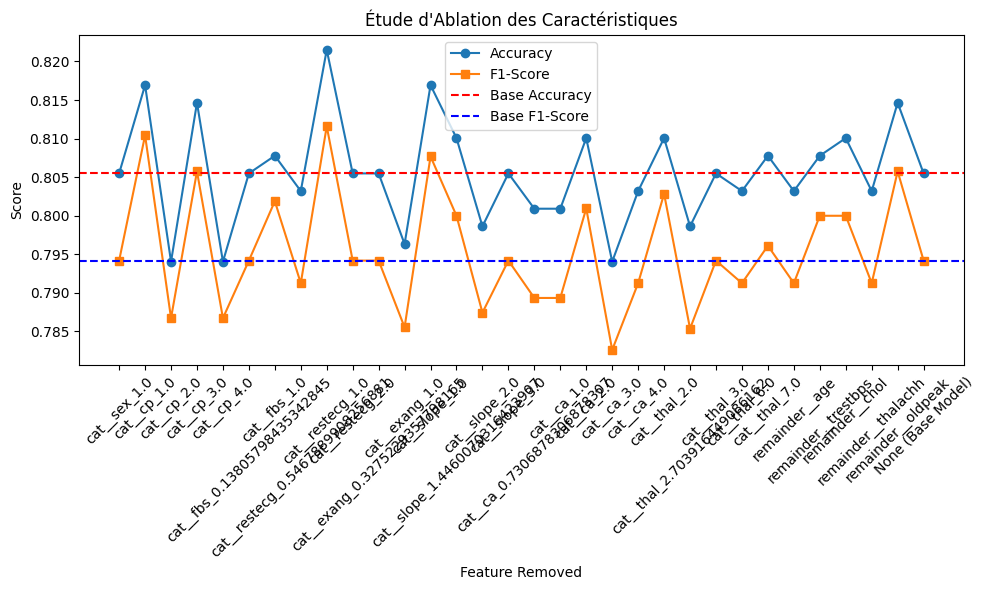

In [28]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Conversion des arrays NumPy en DataFrame Pandas
X_train_df = pd.DataFrame(X_train, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())
X_test_df = pd.DataFrame(X_test, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

# Fonction pour entraîner la régression logistique et évaluer les performances
def evaluate_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=500, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1

# Performances du modèle de base avec toutes les caractéristiques
base_accuracy, base_f1 = evaluate_model(X_train_df, y_train, X_test_df, y_test)

# Liste des colonnes
columns = X_train_df.columns

# Dictionnaire pour stocker les résultats
ablation_results = {"Feature Removed": [], "Accuracy": [], "F1-Score": []}

# Suppression d'une colonne à la fois
for column in columns:
    X_train_ablation = X_train_df.drop(column, axis=1)
    X_test_ablation = X_test_df.drop(column, axis=1)

    # Évaluation du modèle
    accuracy, f1 = evaluate_model(X_train_ablation, y_train, X_test_ablation, y_test)

    # Stockage des résultats
    ablation_results["Feature Removed"].append(column)
    ablation_results["Accuracy"].append(accuracy)
    ablation_results["F1-Score"].append(f1)

# Conversion en DataFrame
ablation_df = pd.DataFrame(ablation_results)

# Ajout des performances du modèle de base
ablation_df.loc[len(ablation_df)] = ["None (Base Model)", base_accuracy, base_f1]

# Affichage des résultats
print("\n=== Résultats de l'Étude d'Ablation ===")
print(ablation_df)

# Graphique des performances
plt.figure(figsize=(10, 6))
plt.plot(ablation_df["Feature Removed"], ablation_df["Accuracy"], marker='o', label="Accuracy")
plt.plot(ablation_df["Feature Removed"], ablation_df["F1-Score"], marker='s', label="F1-Score")
plt.axhline(y=base_accuracy, color='r', linestyle='--', label="Base Accuracy")
plt.axhline(y=base_f1, color='b', linestyle='--', label="Base F1-Score")
plt.xticks(rotation=45)
plt.xlabel("Feature Removed")
plt.ylabel("Score")
plt.title("Étude d'Ablation des Caractéristiques")
plt.legend()
plt.tight_layout()
plt.show()

Comme on peut le remarquer, la suppression d’une caractéristique peut augmenter ou diminuer l’accuracy et le F1 score. Lors de la suppression d’une caractéristique, 19 fois sur 30 notre modèle est moins performant en se basant sur les 2 lignes en pointillés qui représente le modèle de base sans suppression.

On peut donc en conclure que deux tiers des caractéristiques sont nécessaire pour obtenir des meilleurs performances sur mon jeu de données


## 2) Analyse des erreurs

Maintenant, je vais analyser les erreurs potentiels obtenues lors de la prédiction de la régression logistique et essayer de comprendre pourquoi il y a eu des erreurs

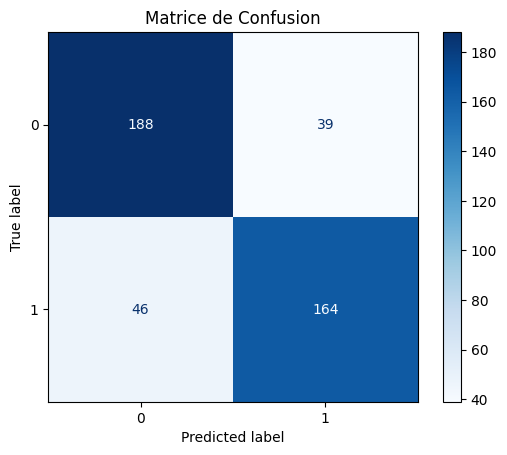

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions
y_pred = logistic_reg.predict(X_test)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Matrice de Confusion")
plt.show()

In [30]:
import pandas as pd

# Convertir les données test et les prédictions en DataFrame pour les analyser
errors_df = pd.DataFrame({"True Label": y_test, "Predicted": y_pred})

# Filtrer les erreurs
errors = errors_df[errors_df["True Label"] != errors_df["Predicted"]]
print("\n=== Cas où le modèle a fait des erreurs ===")
print(errors.head(10))  # affiche seulement les 10 premières erreurs


=== Cas où le modèle a fait des erreurs ===
      True Label  Predicted
71             1          0
1075           0          1
1281           0          1
1541           1          0
2150           0          1
1175           1          0
2178           0          1
993            1          0
1971           1          0
743            0          1


Faux positifs : 39
Faux négatifs : 46


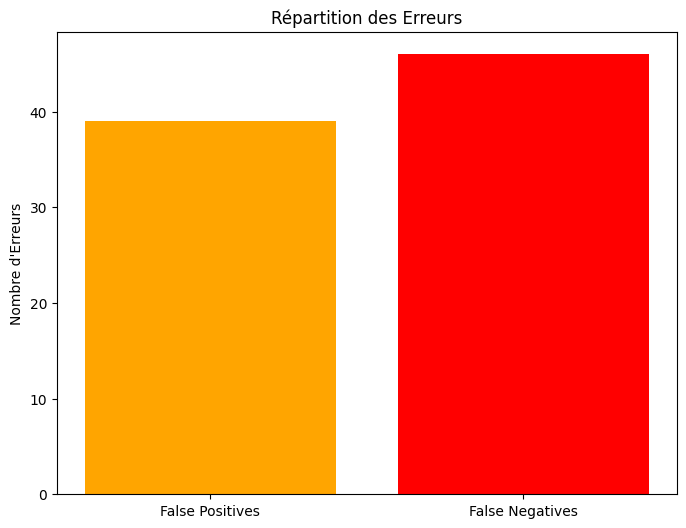

In [31]:
# Faux positifs : le modèle a prédit la classe positive à tort
false_positives = errors_df[(errors_df["True Label"] == 0) & (errors_df["Predicted"] == 1)]
print(f"Faux positifs : {len(false_positives)}")

# Faux négatifs : le modèle a prédit la classe négative à tort
false_negatives = errors_df[(errors_df["True Label"] == 1) & (errors_df["Predicted"] == 0)]
print(f"Faux négatifs : {len(false_negatives)}")

# Répartition des erreurs
plt.figure(figsize=(8, 6))
plt.bar(["False Positives", "False Negatives"], [len(false_positives), len(false_negatives)], color=["orange", "red"])
plt.title("Répartition des Erreurs")
plt.ylabel("Nombre d'Erreurs")
plt.show()



*  Faux Positifs : Le modèle a prédit un problème cardiaque alors qu'il n'y en a pas.
*  Faux Négatifs : Le modèle n'a pas détecté un problème cardiaque alors qu'il y en avait un.
Les faux négatifs sont souvent les plus problématiques dans ce type de projet, car cela signifie que le modèle a raté un cas critique.






## 3) comparaison avec des modèles de bases

Dans cette partie, je vais comparer mes modèles avec un modèle de base qui est le modèle aléatoire

### modèle aléatoire (Random Guessing)

In [32]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.dummy import DummyClassifier

# Modèle Aléatoire
random_guess_model = DummyClassifier(strategy="uniform", random_state=42)
random_guess_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_random = random_guess_model.predict(X_test)

# Évaluation du modèle aléatoire
accuracy_random = accuracy_score(y_test, y_pred_random)
f1_random = f1_score(y_test, y_pred_random, average="weighted")

print("=== Performances du Modèle Aléatoire ===")
print(f"Précision : {accuracy_random:.4f}")
print(f"F1-Score : {f1_random:.4f}")
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred_random))

=== Performances du Modèle Aléatoire ===
Précision : 0.5034
F1-Score : 0.5035

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.52      0.49      0.51       227
           1       0.48      0.52      0.50       210

    accuracy                           0.50       437
   macro avg       0.50      0.50      0.50       437
weighted avg       0.50      0.50      0.50       437



### Graphique de comparaison des performances avec les autres modèles:

=== Performances de Tous les Modèles ===
Logistic Regression: Précision = 0.8055, F1-Score = 0.8053
Decision Tree: Précision = 0.8146, F1-Score = 0.8125
Random Forest: Précision = 0.9451, F1-Score = 0.9451
Extra Trees: Précision = 0.9634, F1-Score = 0.9634
Random Guess: Précision = 0.5034, F1-Score = 0.5035


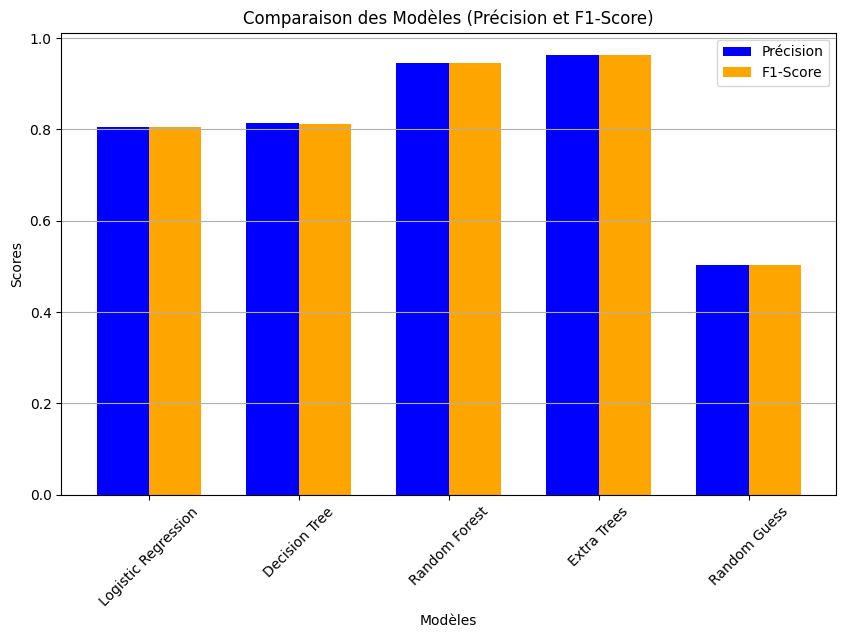

In [33]:
# Ajout des résultats du modèle aléatoire
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Extra Trees", "Random Guess"]
accuracies = [accuracy_lg, accuracy_tree, accuracy_rf, accuracy_etc, accuracy_random]
f1_scores = [f1_lg, f1_tree, f1_rf, f1_etc, f1_random]

# Affichage des performances
print("=== Performances de Tous les Modèles ===")
for model, acc, f1 in zip(models, accuracies, f1_scores):
    print(f"{model}: Précision = {acc:.4f}, F1-Score = {f1:.4f}")

# Visualisation
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, accuracies, width, label="Précision", color="blue")
plt.bar(x + width/2, f1_scores, width, label="F1-Score", color="orange")
plt.xticks(x, models, rotation=45)
plt.xlabel("Modèles")
plt.ylabel("Scores")
plt.title("Comparaison des Modèles (Précision et F1-Score)")
plt.legend()
plt.grid(axis="y")
plt.show()

Pour conclure, le modèle de base est beaucoup moins performant que les autres modèles étudiés dans ce projet. Le modèle le plus performant pour mon jeu de données et l'Extra Trees Classifier qui est quasiment 2 fois plus performant au niveau de la tache de prédiction que le modèle aléatoire.